# For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.

In [35]:
import matplotlib.pyplot as plt

# SF Temps Data

In [22]:
from vega_datasets import data
df1 = data.sf_temps()

In [23]:
df1.head(1)

,temp,date
0,47.8,2010-01-01


In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [25]:
df1.date

0      2010-01-01 00:00:00
1      2010-01-01 01:00:00
2      2010-01-01 02:00:00
3      2010-01-01 03:00:00
4      2010-01-01 04:00:00
               ...        
8754   2010-12-31 19:00:00
8755   2010-12-31 20:00:00
8756   2010-12-31 21:00:00
8757   2010-12-31 22:00:00
8758   2010-12-31 23:00:00
Name: date, Length: 8759, dtype: datetime64[ns]

In [26]:
df1 = df.set_index('date')
df1

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


## 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

Text(0.5, 0, 'Day with Label for Month')

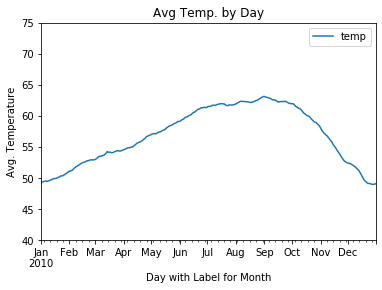

In [53]:
df1.resample('D').mean().plot().set_ylim([40,75])
plt.title('Avg Temp. by Day')
plt.ylabel('Avg. Temperature')
plt.xlabel('Day with Label for Month')

## 2. Write the code necessary to visualize the minimum temperature over time.

Text(0.5, 0, 'Day with Label for Month')

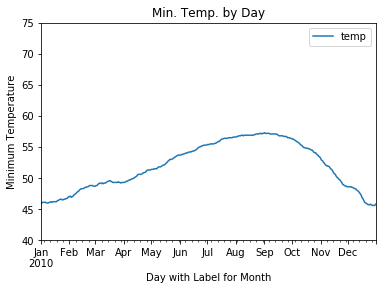

In [54]:
df1.resample('D').min().plot().set_ylim([40,75])
plt.title('Min. Temp. by Day')
plt.ylabel('Minimum Temperature')
plt.xlabel('Day with Label for Month')

## 3. Write the code necessary to visualize the maximum temperature over time.

Text(0.5, 0, 'Day with Label for Month')

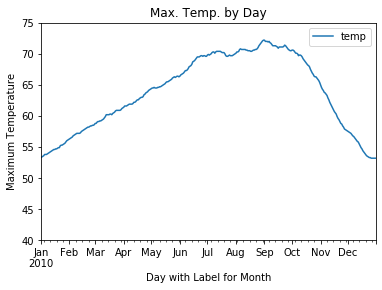

In [55]:
df1.resample('D').max().plot().set_ylim([40,75])
plt.title('Max. Temp. by Day')
plt.ylabel('Maximum Temperature')
plt.xlabel('Day with Label for Month')

## 4. Which month is the coldest, on average?

In [79]:
df1.resample('M').mean().index.max()

Timestamp('2010-12-31 00:00:00', freq='M')

In [74]:
df1.resample('M').mean().idxmin()[0]

Timestamp('2010-01-31 00:00:00')

In [81]:
print('The coldest month is:\n', 
      df1.resample('M').mean().idxmin()[0], 
      'with an average of', 
      df1.resample('M').mean().min()[0])

The coldest month is:
 2010-01-31 00:00:00 with an average of 49.984139784946244


## 5. Which month has the highest average temperature?

In [82]:
print('The coldest month is:\n', 
      df1.resample('M').mean().idxmax()[0], 
      'with an average of', 
      df1.resample('M').mean().max()[0])

The coldest month is:
 2010-09-30 00:00:00 with an average of 62.48708333333335


## 6. Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [86]:
df_min_max = df1.resample('D').agg(['min','max'])

In [91]:
df_min_max.columns

MultiIndex([('temp', 'min'),
            ('temp', 'max')],
           )

In [96]:
df_min_max['delta'] = df_min_max[('temp', 'max')] - df_min_max[('temp', 'min')]

In [106]:
df_min_max.head()

temp       delta
             min   max      
date                        
2010-01-01  45.8  53.3   7.5
2010-01-02  46.0  53.4   7.4
2010-01-03  46.1  53.5   7.4
2010-01-04  46.1  53.6   7.5
2010-01-05  46.1  53.8   7.7

In [107]:
df_min_max.delta.resample('M').mean()

date
2010-01-31     8.341935
2010-02-28     9.485714
2010-03-31    10.854839
2010-04-30    12.320000
2010-05-31    12.909677
2010-06-30    13.950000
2010-07-31    13.977419
2010-08-31    13.870968
2010-09-30    14.403333
2010-10-31    13.432258
2010-11-30    10.236667
2010-12-31     7.925806
Freq: M, Name: delta, dtype: float64

In [109]:
print('The months with the highest average change in temp is\n',
      df_min_max.delta.resample('M').mean().idxmax(),
      'with an average temperature delta of',
      df_min_max.delta.resample('M').mean().max())

The months with the highest average change in temp is
 2010-09-30 00:00:00 with an average temperature delta of 14.40333333333333


## Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

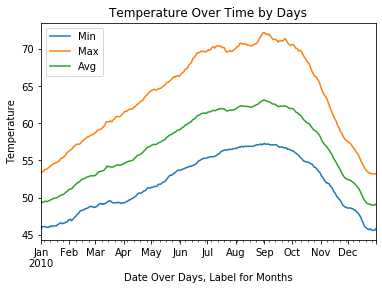

In [115]:
df1.resample('D').agg(['min','max','mean']).plot()
plt.title('Temperature Over Time by Days')
plt.xlabel('Date Over Days, Label for Months')
plt.ylabel('Temperature')
plt.legend(('Min','Max','Avg'))

# Seattle Weather Data

In [7]:
df2 = data.seattle_weather()

In [15]:
df2.head(1)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle


## 1. Which year and month combination has the highest amount of precipitation?

## 2. Visualize the amount of monthly precipitation over time.

## 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

## 4. Which year-month combination is the windiest?

## 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

## 6. In which month does it rain the most?

## 7. Which month has the most number of days with a non-zero amount of precipitation?

# Flights Data

In [9]:
df3 = data.flights_20k()

In [14]:
df3.head(1)

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC


## 1. Convert any negative delays to 0.

## 2. Which hour of the day has the highest average delay?

## 3. Does the day of the week make a difference in the delay amount?

## 4. Does the month make a difference in the delay amount?

# Bonus

In [11]:
df4 = data.iowa_electricity()

In [13]:
df4.head(1)

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361


## 1. For each row, calculate the percentage of the year's total that energy source provided.

## 2. Lineplot of generation over time, color by source

## 3. Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

## 4. Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

## 5. Is the total generation increasing over time?

## 6. How would you control for increasing consumption over time when considering how much energy is coming from each source?

## 7. express each number as a % of the year's total

## Use the sf_temps dataset
## 1. Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

## 2. How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

## 3. Create pretty labels for time plots

## 4. Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar